# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos Agonistas de la Hormona GLP-1**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dra. Eduviges Ludivina Facundo Flores  – Profesor Tutor

#### **Miembros del equipo:**
- Cesar Ivan Herrera Martinez A01796392  
- Juan Antonio Cruz Acosta A01795375 
- Julio Baltazar Colín A01794476 

# Introducción  

La **diabetes mellitus tipo II** es una de las enfermedades crónicas más prevalentes a nivel mundial y representa un grave problema de salud pública. Según la **Organización Mundial de la Salud (OMS)**, en 2021 se estimaron más de *460 millones* de personas viviendo con diabetes, y se proyecta que esta cifra aumente de manera considerable en las próximas décadas [1]. En **América Latina** y particularmente en **México**, la diabetes se ha consolidado como una de las principales causas de mortalidad y discapacidad, con un fuerte impacto tanto en la calidad de vida de los pacientes como en los sistemas de salud [2].  


Uno de los mecanismos terapéuticos más prometedores para el control glucémico es la activación de la hormona **GLP-1 (*Glucagon-like peptide-1*)**, la cual regula de forma clave la secreción de insulina y el metabolismo de la glucosa. Fármacos exitosos como la **semaglutida (Ozempic)** y la **dulaglutida (Trulicity)** se basan en agonistas de GLP-1, logrando resultados altamente eficaces en el tratamiento de la diabetes tipo II y la obesidad. Sin embargo, el diseño y optimización de estos compuestos ha requerido procesos experimentales de laboratorio extensos, prolongados y costosos, que suelen superar los *15 años* de investigación y desarrollo [3].  

El objetivo de este proyecto es **desarrollar un modelo de inteligencia artificial** capaz de identificar y generar compuestos moleculares con alta eficiencia agonista de la hormona GLP-1, lo que podría acelerar el descubrimiento de nuevos fármacos para el tratamiento de la diabetes tipo II y la obesidad. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.  

En esta etapa, se analizarán datos obtenidos de bases de datos especializadas como **DrugBank** y **Protein Data Bank (PDB)** [4,5], que contienen información sobre agonistas de GLP-1 y secuencias de proteínas en formato **FASTA**. El análisis exploratorio permitirá:  

* **Comprender la distribución de los datos:** Identificar patrones, tendencias y posibles inconsistencias en las secuencias de péptidos.  
* **Descubrir relaciones entre variables:** Explorar la asociación entre propiedades bioquímicas y la afinidad con GLP-1.  
* **Identificar variables clave:** Seleccionar las características más relevantes para el diseño del modelo de IA.  

El **análisis exploratorio de datos** constituye un paso fundamental para garantizar la efectividad del modelo de IA. Comprender las características intrínsecas de los péptidos permitirá aplicar técnicas de preprocesamiento y modelado más precisas en etapas posteriores, aumentando la probabilidad de éxito en la predicción y diseño de nuevos agonistas de GLP-1.  

Este proyecto tiene el potencial de contribuir al desarrollo de terapias más innovadoras, seguras y accesibles, beneficiando a millones de personas que padecen diabetes tipo II en todo el mundo.  

---

### Referencias  

[1] World Health Organization. (2021). *Diabetes*. https://www.who.int/news-room/fact-sheets/detail/diabetes  

[2] Secretaría de Salud México. (2022). *Epidemiología de la Diabetes Mellitus en México*. Gobierno de México.  

[3] Drucker, D. J. (2018). Mechanisms of Action and Therapeutic Application of Glucagon-like Peptide-1. *Cell Metabolism*, 27(4), 740–756. https://doi.org/10.1016/j.cmet.2018.03.001  

[4] Wishart, D. S., et al. (2018). DrugBank 5.0: A major update to the DrugBank database for 2018. *Nucleic Acids Research*, 46(D1), D1074–D1082. https://doi.org/10.1093/nar/gkx1037  

[5] Berman, H. M., et al. (2000). The Protein Data Bank. *Nucleic Acids Research*, 28(1), 235–242. https://doi.org/10.1093/nar/28.1.235  


# Análisis Exploratorio de Datos (EDA)

## Descripción y origen del conjunto de datos
Para este proyecto se usarán las bases de datos del National Center for Biotechnology (NCBI) con datos referentes a grupos de proteínas análogas al GLP-1R de diferentes especies y algunos agonistas de GLP-1 de uso médico para el tratamiento de la diabetes tipo II.

Como fuente principal para el modelo se empleará el conjunto de datos del estudio de Puszkarska, A.M., et al. (2024). Este consiste en 125 péptidos con su respectiva actividad (EC50) medida para los receptores GCGR y GLP-1R de forma experimental
Adicionalmente se incluyen algunos compuestos catlogados en la base de datos UniProt como de estructura similar a la GLP-1

Origenes de los datos:

- 125 péptidos con su respectiva actividad (EC50)  Puszkarska, A.M., et al. (2024)
https://github.com/amp91/PeptideModels/raw/refs/heads/main/peptide_models/data/training_data.xlsx

- 288 Peptidos en formato FASTA referidos por Puszkarska, A.M., et al. (2024)
https://github.com/amp91/PeptideModels/raw/refs/heads/main/peptide_models/data/FASTA_files/NCBI_data/GLP1.fasta

- Archivo FASTA con proteinas identicas a la GLP1 (UniProt)
 https://www.uniprot.org/uniprotkb?query=uniref_cluster_100%3AUniRef100_P01275

 - Archivo FASTA con proteinas con coincidencia del 50% a la GLP1 (UniProt)
 https://www.uniprot.org/uniprotkb?query=uniref_cluster_50%3AUniRef50_P01275

 - Archivo FASTA de medicamentos aprobados y bajo investigacion agonistas de GLP-1 con actividad sobre GLP-1r (drugbank)
 https://go.drugbank.com/categories/DBCAT002693

 - Archivo excel de secuencias similares porporcionadas por alpaFold con 1945 registros
 https://alphafold.com/search/sequence/HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR?page=1

- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 (NCBI)
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3Esp%7CP01275%7CGLUC_HUMAN%20Pro-glucagon%20OS%3DHomo%20sapiens%20OX%3D9606%20GN%3DGCG%20PE%3D1%20SV%3D3%0AMKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS%0ADYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI%0AAWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK&JOB_TITLE=sp%7CP01275%7CGLUC_HUMAN%20Pro-glucagon%20full%20seq%20%28refseq%20protein%29&NEWWIN=on&NEWWIN=on&GAPCOSTS=11%201&DATABASE=refseq_protein&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=0.05&WORD_SIZE=5&MATRIX_NAME=BLOSUM62&COMPOSITION_BASED_STATISTICS=2&PROG_DEFAULTS=on&SHOW_OVERVIEW=true&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on

- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 usando el segmento identificado como activo sobre GLP-1r (NCBI)
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3EP01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%0AHAEGTFTSDVSSYLEGQAAKEFIAWLVKGR&JOB_TITLE=P01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%20refernce%20proteins&NEWWIN=on&NEWWIN=on&GAPCOSTS=9%201&DATABASE=refseq_protein&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=200000&WORD_SIZE=2&MATRIX_NAME=PAM30&COMPOSITION_BASED_STATISTICS=0&EQ_MENU=Enter%20organism%20name%20or%20id--completions%20will%20be%20suggested&PROG_DEFAULTS=on&SHOW_OVERVIEW=on&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on


- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 usando el segmento identificado como activo sobre GLP-1r (NCBI)
All non-redundant GenBank CDS translations+PDB+SwissProt+PIR+PRF excluding environmental samples from WGS
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3EP01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%0AHAEGTFTSDVSSYLEGQAAKEFIAWLVKGR&JOB_TITLE=P01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%20refernce%20proteins&NEWWIN=on&NEWWIN=on&GAPCOSTS=9%201&DATABASE=nr&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=200000&WORD_SIZE=2&MATRIX_NAME=PAM30&COMPOSITION_BASED_STATISTICS=0&PROG_DEFAULTS=on&SHOW_OVERVIEW=on&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on

## Validación de los archivos en formato FASTA

In [17]:
# Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from typing import Optional
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis


### Funciones de Apoyo para el análisis

In [18]:
def validate_fasta_file(file_path: str) -> Optional[int]:
    """
    Valida un archivo FASTA y, si es válido, cuenta el número de registros.

    Args:
        file_path: La ruta al archivo que se quiere validar.

    Returns:
        El número de registros (int) si el archivo es válido.
        None si el archivo es inválido o no se encuentra.
    """
    print(f"Procesando archivo: {file_path}...")
    contador = 0
    try:
        with open(file_path, "r") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                # Verificación de que la secuencia no esté vacía
                if len(record.seq) == 0:
                    print(f" Error: El registro '{record.id}' no tiene secuencia.")
                    return None
                
                # Si el registro es válido, incrementamos el contador
                contador += 1
        
        # Si el bucle termina, el archivo es válido
        print(f" ¡Formato correcto! Se encontraron {contador} registros.")
        return contador

    except FileNotFoundError:
        print(f"Error: El archivo no se encontró en la ruta especificada.")
        return None
    except Exception as e:
        print(f"Error de formato FASTA inválido: {e}")
        return None



In [19]:
def remove_duplicate_seqs(path_to_fasta_files: list) -> list:
    """
    Lee múltiples archivos FASTA, elimina secuencias duplicadas y devuelve una
    lista de registros únicos. No se hacen busquedas por segmentos de secuencias.

    Args:
        lista_rutas_fasta: Una lista de objetos Path a los archivos FASTA.

    Returns:
        Una lista de objetos SeqRecord únicos.
    """
    sequencies_seen = {}
    total_read = 0
    
    print("Iniciando lectura y depuración de secuencias...")
    
    for ruta_archivo in path_to_fasta_files:
        try:
            with open(ruta_archivo, "r") as handle:
                # Parseamos cada archivo FASTA
                for record in SeqIO.parse(handle, "fasta"):
                    total_read += 1
                    sequency_str = str(record.seq).upper()
                    
                    # Si la secuencia no ha sido vista antes, la guardamos.
                    # La clave es la secuencia, el valor es el registro completo.
                    if sequency_str not in sequencies_seen:
                        sequencies_seen[sequency_str] = record
                        sequencies_seen[sequency_str].file = ruta_archivo.name  # Guardamos el nombre del archivo de origen
        except FileNotFoundError:
            print(f"Advertencia: No se encontró el archivo '{ruta_archivo}'. Será omitido.")

    # La lista de registros únicos son los valores de nuestro diccionario
    unique_records = list(sequencies_seen.values())
    
    # --- Reporte Final ---
    print("\n--- RESUMEN DE LA DEPURACIÓN ---")
    print(f"Archivos procesados: {len(path_to_fasta_files)}")
    print(f"Total de registros leídos: {total_read}")
    duplicados = total_read - len(unique_records)
    print(f"Registros duplicados eliminados: {duplicados}")
    print(f"Total de secuencias únicas: {len(unique_records)}")
    
    return unique_records

In [20]:
def property_calculation(sequence: str) -> dict:
    """
    Calcula propiedades físico-químicas de una secuencia de aminoácidos.
    Devuelve None si la secuencia contiene caracteres no estándar (ej. 'X').
    """
    # Lista de aminoácidos estándar que ProtParam puede manejar
    aminoacidos_estandar = "ACDEFGHIKLMNPQRSTVWY"
    
    # Verificamos si hay caracteres no estándar en la secuencia
    if any(aa not in aminoacidos_estandar for aa in sequence):
        return {
            'peso_molecular': None,
            'punto_isoelectrico': None,
            'hidrofobicidad_gravy': None
        }
    
    try:
        analisis = ProteinAnalysis(sequence)
        return {
            'peso_molecular': analisis.molecular_weight(),
            'punto_isoelectrico': analisis.isoelectric_point(),
            'hidrofobicidad_gravy': analisis.gravy()
        }
    except Exception as e:
        print(f"No se pudo analizar la secuencia: {sequence[:30]}... Error: {e}")
        return {'peso_molecular': None, 'punto_isoelectrico': None, 'hidrofobicidad_gravy': None}


### Carga y conversion del archivo de alpha fold al formato fasta para el analisis

In [21]:
# Ruta los archivos de datos
directorio_base = Path("../data/raw")

In [22]:
archivo_csv = directorio_base / 'aphaFoldSimilarToGLP1.csv'
archivo_fasta = directorio_base / 'aphaFoldSimilarToGLP1.fasta'

print(f"Iniciando la conversión de '{archivo_csv}' a '{archivo_fasta}'...")

try:
    # Cargar el archivo CSV en un DataFrame de pandas
    df_aphaFoldSimilarToGLP1 = pd.read_csv(archivo_csv)

    # Abrir el archivo de salida en modo de escritura
    with open(archivo_fasta, 'w') as fasta_file:
        # Iterar sobre cada fila del DataFrame
        for index, row in df_aphaFoldSimilarToGLP1.iterrows():
            # Extraer la información necesaria de las columnas
            accession = row['AFDB accession']
            description = row['Description']
            species = row['Species']
            sequence = row['Target sequence']

            # 1. Construir el encabezado FASTA
            # Formato: >ID_de_acceso Descripción [Especie]
            header = f">{accession} {description} [{species}]"

            # 2. Escribir el encabezado y la secuencia en el archivo de salida
            fasta_file.write(header + '\n')
            fasta_file.write(sequence + '\n')
    
    print(f"¡Conversión completada! Se procesaron {len(df_aphaFoldSimilarToGLP1)} registros.")
    print(f"Tu nuevo archivo se llama: {archivo_fasta}")

except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo '{archivo_csv}'.")
    print("Asegúrate de que el script y el archivo CSV estén en la misma carpeta.")
except KeyError as e:
    print(f"Error: Una columna esperada no fue encontrada: {e}.")
    print("Por favor, revisa que tu archivo CSV tenga las columnas correctas.")

Iniciando la conversión de '..\data\raw\aphaFoldSimilarToGLP1.csv' a '..\data\raw\aphaFoldSimilarToGLP1.fasta'...
¡Conversión completada! Se procesaron 1944 registros.
Tu nuevo archivo se llama: ..\data\raw\aphaFoldSimilarToGLP1.fasta


### Analisis del número de registros de los archivos FASTA

In [23]:
# Lista de nombres de archivos FASTA
archivos_fasta = [
     "human_pro_glucagon.fasta"
    ,"uniprotkb_100_identity_HGLP-1.fasta"
    ,"uniprotkb_90_identity_HGLP-1.fasta"
    ,"uniprotkb_50_identity_HGLP-1.fasta"
    ,"BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta"
    ,"GLP-1_agonists_drugs.fasta"
    ,"GLP1_Puszkarska.fasta"
    ,"aphaFoldSimilarToGLP1.fasta"
]

rutas_completas = [directorio_base / nombre for nombre in archivos_fasta]
rutas_completas

[WindowsPath('../data/raw/human_pro_glucagon.fasta'),
 WindowsPath('../data/raw/uniprotkb_100_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/uniprotkb_90_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/uniprotkb_50_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta'),
 WindowsPath('../data/raw/GLP-1_agonists_drugs.fasta'),
 WindowsPath('../data/raw/GLP1_Puszkarska.fasta'),
 WindowsPath('../data/raw/aphaFoldSimilarToGLP1.fasta')]

In [24]:
# validar y contar los registros fasta por archivo

resultados_archivos = {}

print("\n--- Iniciando validación y conteo de archivos ---")
# Usamos la lista de rutas que acabamos de crear
for archivo_path in rutas_completas:
    num_registros = validate_fasta_file(archivo_path)
    
    # Usamos archivo_path.name para obtener solo el nombre del archivo para el reporte
    if num_registros is not None:
        resultados_archivos[archivo_path.name] = num_registros
    
    print("-" * 20)

print("\n--- Proceso terminado ---")
print("Resumen de archivos válidos y su contenido:")

if resultados_archivos:
    for archivo, cuenta in resultados_archivos.items():
        print(f"  - {archivo}: {cuenta} registros")
else:
    print("No se encontraron archivos FASTA válidos.")


--- Iniciando validación y conteo de archivos ---
Procesando archivo: ..\data\raw\human_pro_glucagon.fasta...
 ¡Formato correcto! Se encontraron 1 registros.
--------------------
Procesando archivo: ..\data\raw\uniprotkb_100_identity_HGLP-1.fasta...
 ¡Formato correcto! Se encontraron 5 registros.
--------------------
Procesando archivo: ..\data\raw\uniprotkb_90_identity_HGLP-1.fasta...
 ¡Formato correcto! Se encontraron 18 registros.
--------------------
Procesando archivo: ..\data\raw\uniprotkb_50_identity_HGLP-1.fasta...
 ¡Formato correcto! Se encontraron 25 registros.
--------------------
Procesando archivo: ..\data\raw\BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta...
 ¡Formato correcto! Se encontraron 100 registros.
--------------------
Procesando archivo: ..\data\raw\GLP-1_agonists_drugs.fasta...
 ¡Formato correcto! Se encontraron 6 registros.
--------------------
Procesando archivo: ..\data\raw\GLP1_Puszkarska.fasta...
 ¡Formato correcto! Se encontraron 288 registros.
--

## Eliminacion de secuencias duplicadas

In [25]:
secuencias_unicas = remove_duplicate_seqs(rutas_completas)

lista_para_df = [
    {
        'ID': record.id,
        'Descripcion': record.description,
        'Secuencia': str(record.seq),
        'Archivo_origen': record.file
    }
    for record in secuencias_unicas
]

# Creamos el DataFrame
df_peptidos_unicos = pd.DataFrame(lista_para_df)

print("\nSe ha creado un DataFrame con las secuencias únicas.")
print("Primeras 5 filas del DataFrame:")
print(df_peptidos_unicos.head())

Iniciando lectura y depuración de secuencias...

--- RESUMEN DE LA DEPURACIÓN ---
Archivos procesados: 8
Total de registros leídos: 2387
Registros duplicados eliminados: 1465
Total de secuencias únicas: 922

Se ha creado un DataFrame con las secuencias únicas.
Primeras 5 filas del DataFrame:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRS

In [26]:
df_peptidos_unicos.describe()

,ID,Descripcion,Secuencia,Archivo_origen
count,922,922,922,922
unique,922,922,922,8
top,sp|P01275|GLUC_HUMAN,sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,aphaFoldSimilarToGLP1.fasta
freq,1,1,1,768


In [27]:
df_peptidos_unicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              922 non-null    object
 1   Descripcion     922 non-null    object
 2   Secuencia       922 non-null    object
 3   Archivo_origen  922 non-null    object
dtypes: object(4)
memory usage: 28.9+ KB


## 1. Análisis de Longitud de Secuencias
¿Son todos de un tamaño similar o hay una gran variabilidad?

Estadísticas de la Longitud de las Secuencias:
count     922.000000
mean      173.290672
std       122.502162
min        26.000000
25%       122.000000
50%       179.000000
75%       201.000000
max      1183.000000
Name: Longitud, dtype: float64


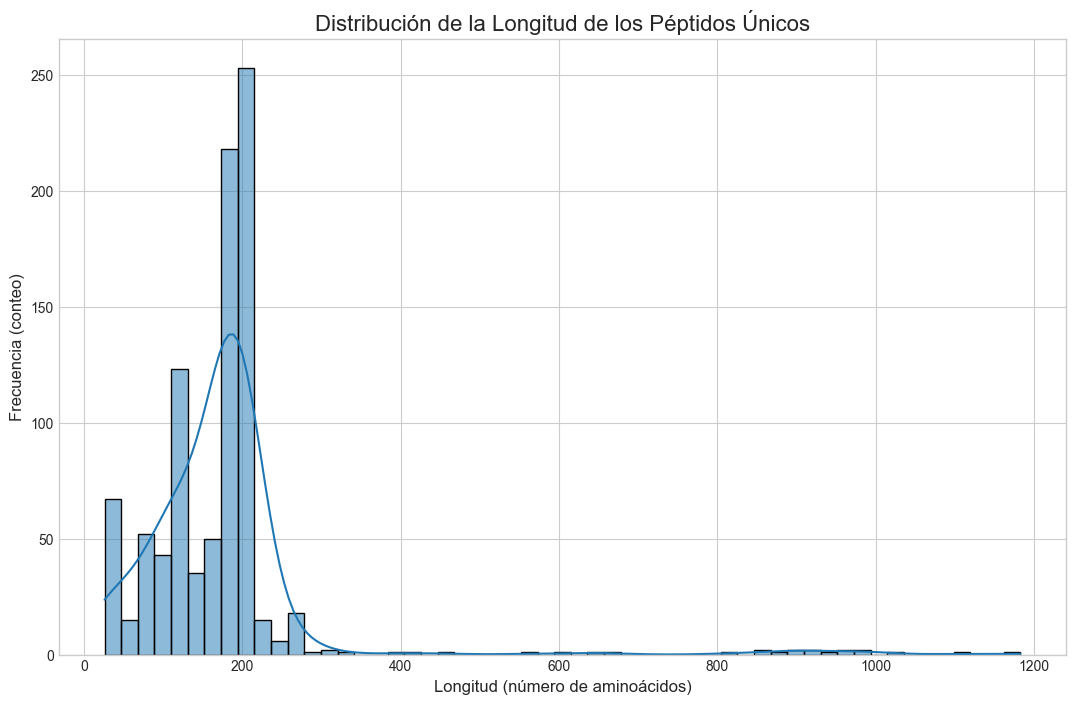

In [28]:
# Calcular la longitud de cada secuencia
df_peptidos_unicos['Longitud'] = df_peptidos_unicos['Secuencia'].apply(len)

# Mostrar estadísticas descriptivas de la longitud
print("Estadísticas de la Longitud de las Secuencias:")
print(df_peptidos_unicos['Longitud'].describe())

# Visualizar la distribución con un histograma
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(13, 8))

sns.histplot(df_peptidos_unicos['Longitud'], kde=True, bins=55)

plt.title('Distribución de la Longitud de los Péptidos Únicos', fontsize=16)
plt.xlabel('Longitud (número de aminoácidos)', fontsize=12)
plt.ylabel('Frecuencia (conteo)', fontsize=12)
plt.show()

## 2. Análisis de Frecuencia de Aminoácidos

C:\Users\Dev\AppData\Local\Temp\ipykernel_13832\847608620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frecuencia.index, y=df_frecuencia['Frecuencia'], palette='viridis_r', hue_order=df_frecuencia.index)


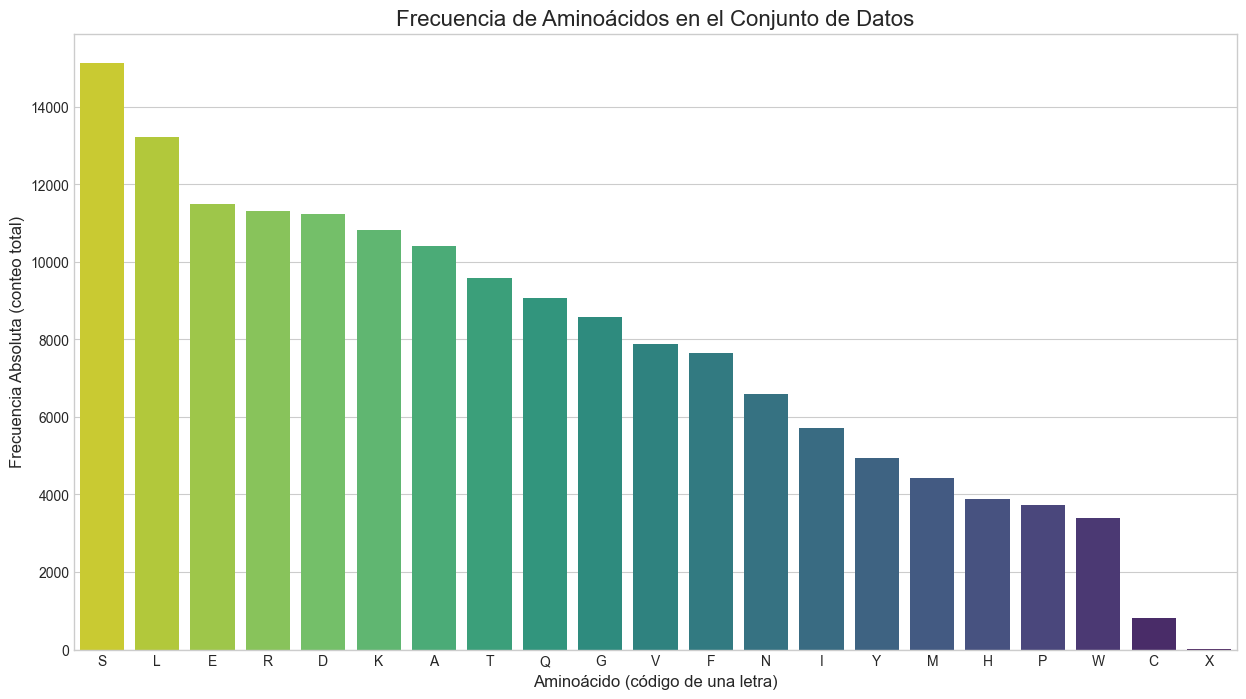

In [29]:
from collections import Counter

# --- Concatenar todas las secuencias en un solo string ---
todas_las_secuencias = "".join(df_peptidos_unicos['Secuencia'])

# --- Contar la frecuencia de cada aminoácido ---
frecuencia_aa = Counter(todas_las_secuencias)
df_frecuencia = pd.DataFrame.from_dict(frecuencia_aa, orient='index', columns=['Frecuencia'])
df_frecuencia = df_frecuencia.sort_values('Frecuencia', ascending=False)

# --- Visualizar las frecuencias con un gráfico de barras ---
plt.figure(figsize=(15, 8))
sns.barplot(x=df_frecuencia.index, y=df_frecuencia['Frecuencia'], palette='viridis_r', hue_order=df_frecuencia.index)

plt.title('Frecuencia de Aminoácidos en el Conjunto de Datos', fontsize=16)
plt.xlabel('Aminoácido (código de una letra)', fontsize=12)
plt.ylabel('Frecuencia Absoluta (conteo total)', fontsize=12)
plt.show()

### Catálogo de aminoácidos

| Símbolo | Aminoácido                                      |
|---------|-------------------------------------------------|
| A       | Alanine                                         |
| B       | Aspartic acid (D) or Asparagine (N)            |
| C       | Cysteine                                        |
| D       | Aspartic acid                                   |
| E       | Glutamic acid                                   |
| F       | Phenylalanine                                   |
| G       | Glycine                                         |
| H       | Histidine                                       |
| I       | Isoleucine                                      |
| J       | Leucine (L) or Isoleucine (I)                  |
| K       | Lysine                                          |
| L       | Leucine                                         |
| M       | Methionine / Start codon                        |
| N       | Asparagine                                      |
| O       | Pyrrolysine (rare)                              |
| P       | Proline                                         |
| Q       | Glutamine                                       |
| R       | Arginine                                        |
| S       | Serine                                          |
| T       | Threonine                                       |
| U       | Selenocysteine (rare)                           |
| V       | Valine                                          |
| W       | Tryptophan                                      |
| Y       | Tyrosine                                        |
| Z       | Glutamic acid (E) or Glutamine (Q)             |
| X       | Any                                             |
| *       | Translation stop                                |
| -       | Gap of indeterminate length                     |


## 3 Cálculo de propiedades físico-químicas

Iniciando el cálculo de propiedades físico-químicas...

 Propiedades calculadas y añadidas al DataFrame.
Primeras 5 filas del DataFrame enriquecido:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
2  MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...   
3  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...   
4  MKSIYFVA

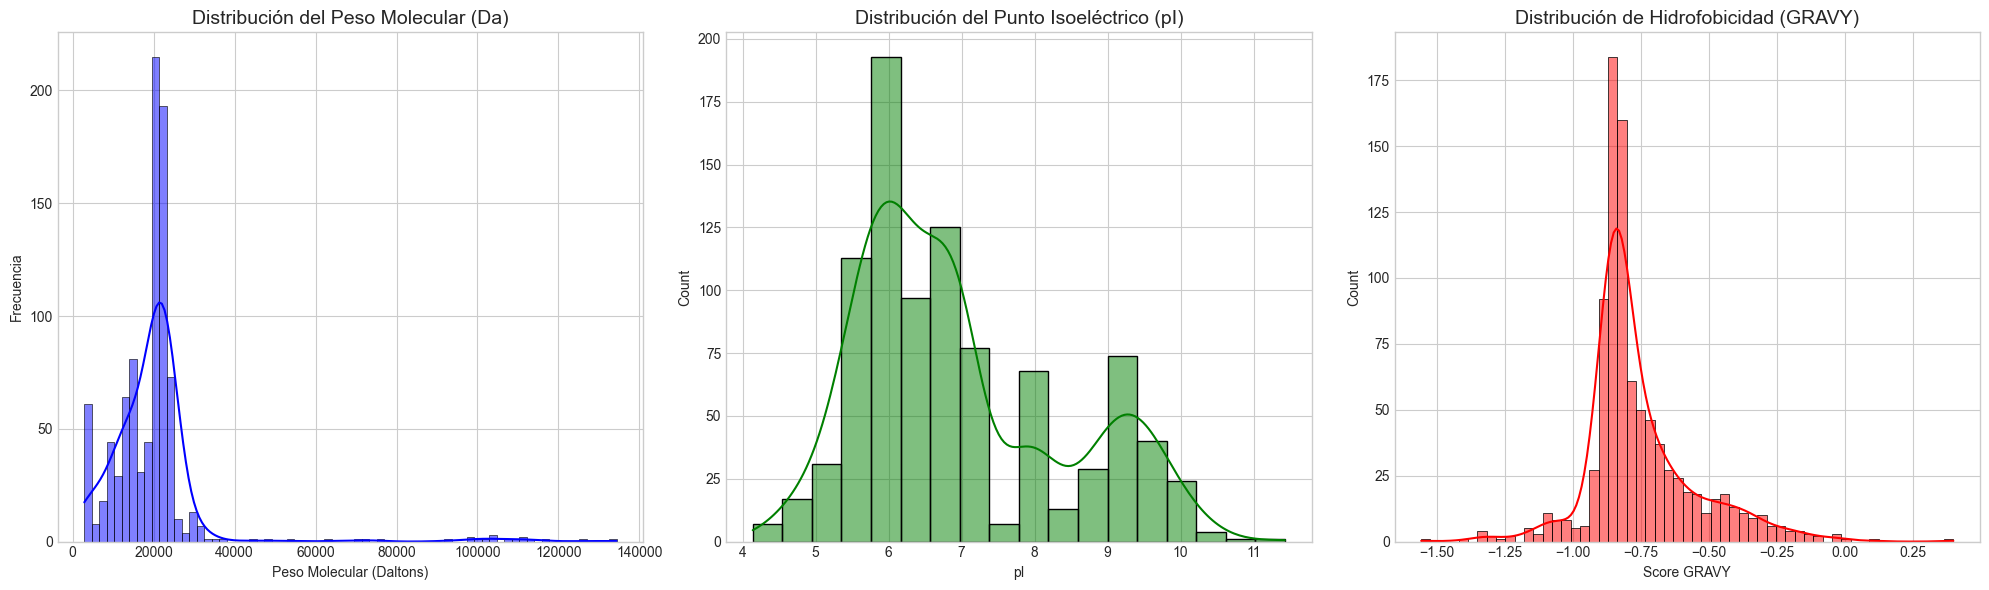


Resumen estadístico de las propiedades calculadas:
       peso_molecular  punto_isoelectrico  hidrofobicidad_gravy
count      921.000000          921.000000            921.000000
mean     19984.801100            6.944126             -0.755686
std      13963.694729            1.407308              0.202163
min       2877.160000            4.138413             -1.556944
25%      14051.446200            5.858190             -0.860199
50%      20872.961100            6.576749             -0.818889
75%      23174.664600            7.848268             -0.690449
max     134336.872000           11.429680              0.398714


In [30]:
print("Iniciando el cálculo de propiedades físico-químicas...")

propiedades_df = df_peptidos_unicos['Secuencia'].apply(lambda seq: pd.Series(property_calculation(seq)))


df_analisis = pd.concat([df_peptidos_unicos, propiedades_df], axis=1)

print("\n Propiedades calculadas y añadidas al DataFrame.")
print("Primeras 5 filas del DataFrame enriquecido:")
print(df_analisis.head())


# distribución de nuevas propiedades
print("\n Generando visualizaciones de las nuevas propiedades...")

# estilo de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Histograma del Peso Molecular
sns.histplot(df_analisis['peso_molecular'].dropna(), kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución del Peso Molecular (Da)', fontsize=14)
axes[0].set_xlabel('Peso Molecular (Daltons)')
axes[0].set_ylabel('Frecuencia')

# Histograma del Punto Isoeléctrico (pI)
sns.histplot(df_analisis['punto_isoelectrico'].dropna(), kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución del Punto Isoeléctrico (pI)', fontsize=14)
axes[1].set_xlabel('pI')

# Histograma del Score GRAVY (Hidrofobicidad)
sns.histplot(df_analisis['hidrofobicidad_gravy'].dropna(), kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribución de Hidrofobicidad (GRAVY)', fontsize=14)
axes[2].set_xlabel('Score GRAVY')

plt.tight_layout()
plt.show()

# Resumen estadístico de las nuevas columnas
print("\nResumen estadístico de las propiedades calculadas:")
print(df_analisis[['peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']].describe())


In [34]:
df_analisis.describe()


,Longitud,peso_molecular,punto_isoelectrico,hidrofobicidad_gravy
count,922.000000,921.000000,921.000000,921.000000
mean,173.290672,19984.801100,6.944126,-0.755686
std,122.502162,13963.694729,1.407308,0.202163
min,26.000000,2877.160000,4.138413,-1.556944
25%,122.000000,14051.446200,5.858190,-0.860199
50%,179.000000,20872.961100,6.576749,-0.818889
75%,201.000000,23174.664600,7.848268,-0.690449
max,1183.000000,134336.872000,11.429680,0.398714


In [35]:
df_analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    922 non-null    object 
 1   Descripcion           922 non-null    object 
 2   Secuencia             922 non-null    object 
 3   Archivo_origen        922 non-null    object 
 4   Longitud              922 non-null    int64  
 5   peso_molecular        921 non-null    float64
 6   punto_isoelectrico    921 non-null    float64
 7   hidrofobicidad_gravy  921 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 57.8+ KB


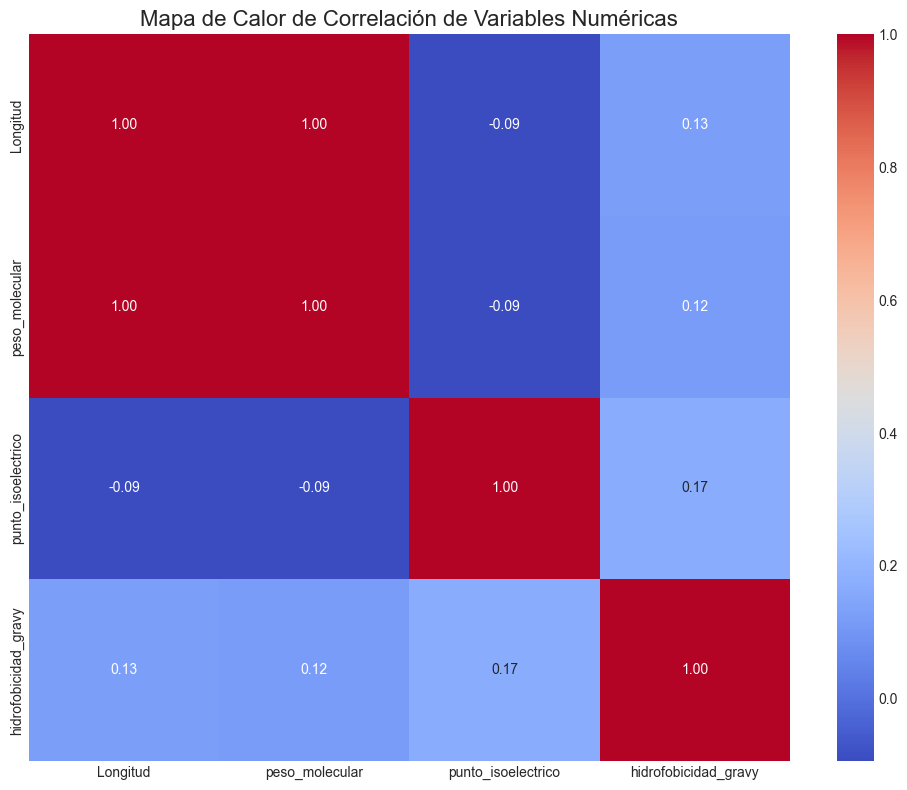

In [36]:

# solo las columnas numéricas para la correlación
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']
df_numerico = df_analisis[columnas_numericas]

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8)) # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_correlacion, 
            annot=True,      # Muestra los valores de correlación en las celdas
            cmap='coolwarm', # Elige un mapa de color (coolwarm es bueno para correlaciones)
            fmt=".2f")       # Formatea los números a dos decimales

# Añadir un título y mostrar el gráfico
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

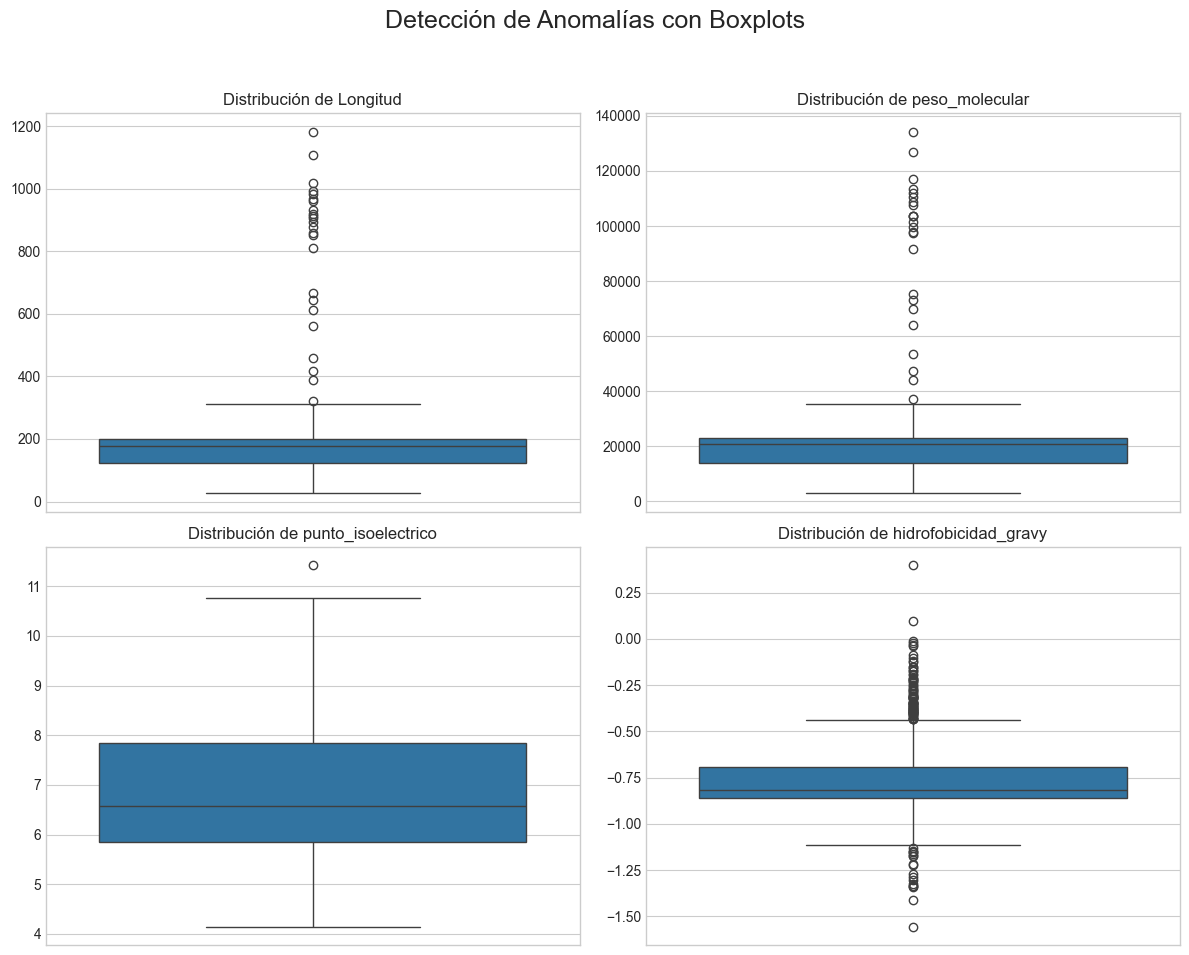

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que tu DataFrame se llama df_analisis
# Si no lo tienes cargado, necesitarías una línea como:
# df_analisis = pd.read_csv('tu_archivo.csv')

# 1. Lista de las columnas numéricas que quieres visualizar
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']

# 2. Crear una figura y un conjunto de subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Detección de Anomalías (outliers) con Boxplots', fontsize=18)

# 3. Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

# 4. Iterar sobre cada columna numérica y crear un boxplot en su respectivo subplot
for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df_analisis[col], ax=axes[i], orient='v')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel('') # Opcional: limpiar la etiqueta del eje y

# 5. Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para que el título principal no se solape
plt.show()

## Analísis de alineación de las secuencias de aminoácidos

In [ ]:
#Ejecutar Clustal Omega para windows las librerias de bio para alinear las secuencias de aminoácidos
#  
#! cd-hit -i data/processed/DCTPep.fasta -o data/processed/DCTPep.txt -c 0.99

import subprocess

# Define the WSL command buscar 
command = ["wsl", "cd-hit", "-i", "../data/processed/DCTPep.fasta", "-o", "../data/processed/DCTPep.txt", "-c", "0.99"]

# Run the command
result = subprocess.run(command, capture_output=True, text=True)

# Print the output and errors
print("STDOUT:", result.stdout)
print("STDERR:", result.stderr)


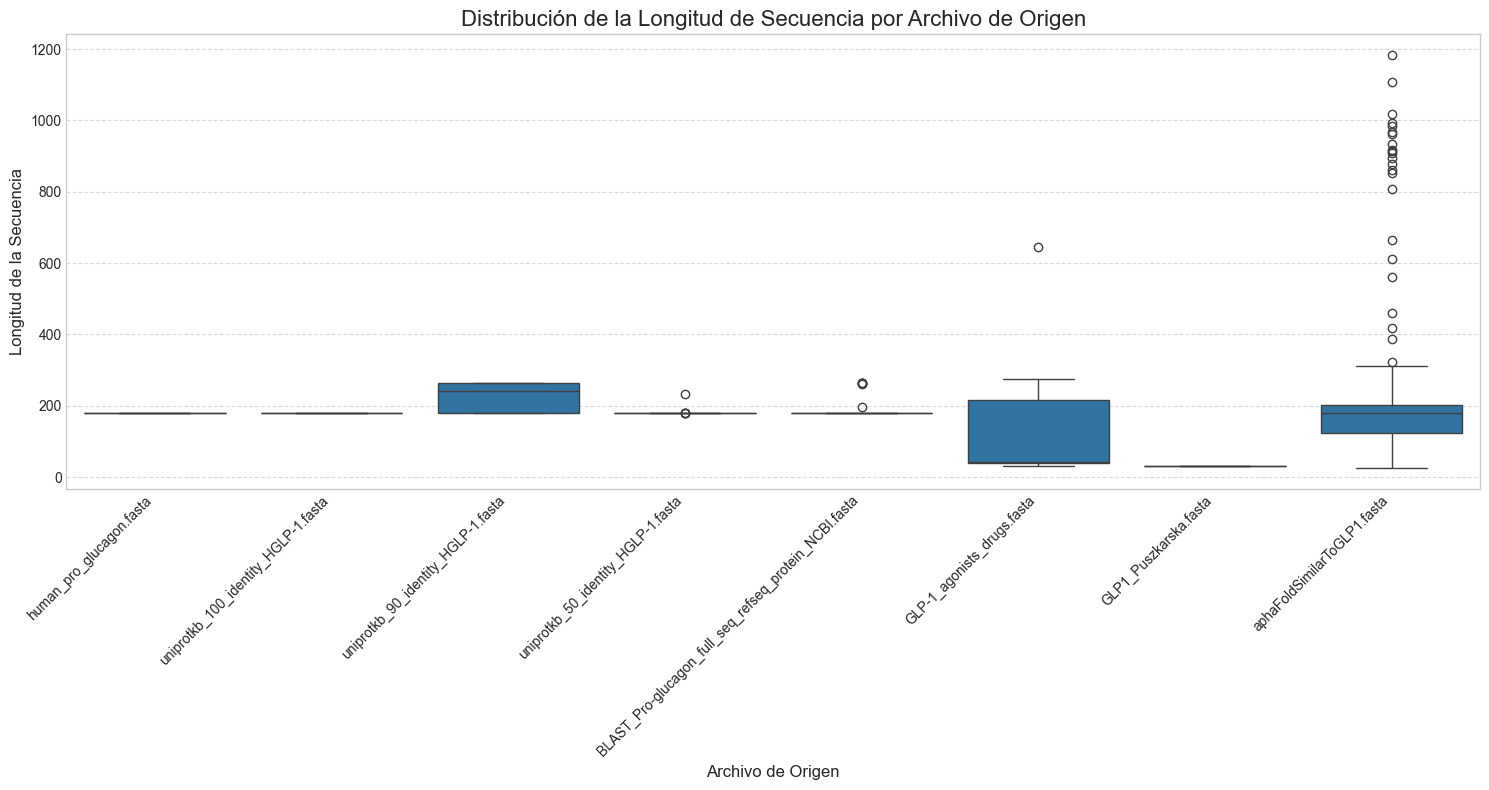

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que tu DataFrame se llama df_analisis
# Si no lo tienes cargado, necesitarías una línea como:
# df_analisis = pd.read_csv('tu_archivo.csv')

# 1. Crear la figura para el gráfico
plt.figure(figsize=(15, 8)) # Ajusta el tamaño según el número de categorías

# 2. Generar el boxplot
sns.boxplot(x='Archivo_origen', y='Longitud', data=df_analisis)

# 3. Mejorar la legibilidad del gráfico
plt.title('Distribución de la Longitud de Secuencia por Archivo de Origen', fontsize=16)
plt.xlabel('Archivo de Origen', fontsize=12)
plt.ylabel('Longitud de la Secuencia', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para que no se solapen
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una rejilla para facilitar la lectura

# 4. Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd

# Asumiendo que tu DataFrame original se llama df_analisis

# 1. Calcular el Rango Intercuartílico (IQR) para la columna 'Longitud'
Q1 = df_analisis['Longitud'].quantile(0.25)
Q3 = df_analisis['Longitud'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior para outliers: {limite_inferior}")
print(f"Límite superior para outliers: {limite_superior}\n")

# 3. Filtrar el DataFrame y crear uno nuevo sin los outliers
df_filtrado = df_analisis[
    (df_analisis['Longitud'] >= limite_inferior) & 
    (df_analisis['Longitud'] <= limite_superior)
]

# 4. Verificar el resultado
print(f"Tamaño del DataFrame original: {df_analisis.shape[0]} filas")
print(f"Tamaño del DataFrame nuevo (sin outliers): {df_filtrado.shape[0]} filas")
print(f"Se eliminaron {df_analisis.shape[0] - df_filtrado.shape[0]} filas.")

# Opcional: Muestra las primeras filas del nuevo DataFrame
print("\nPrimeras filas del DataFrame filtrado:")
print(df_filtrado.head())

Límite inferior para outliers: 3.5
Límite superior para outliers: 319.5

Tamaño del DataFrame original: 922 filas
Tamaño del DataFrame nuevo (sin outliers): 898 filas
Se eliminaron 24 filas.

Primeras filas del DataFrame filtrado:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
2  MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSW

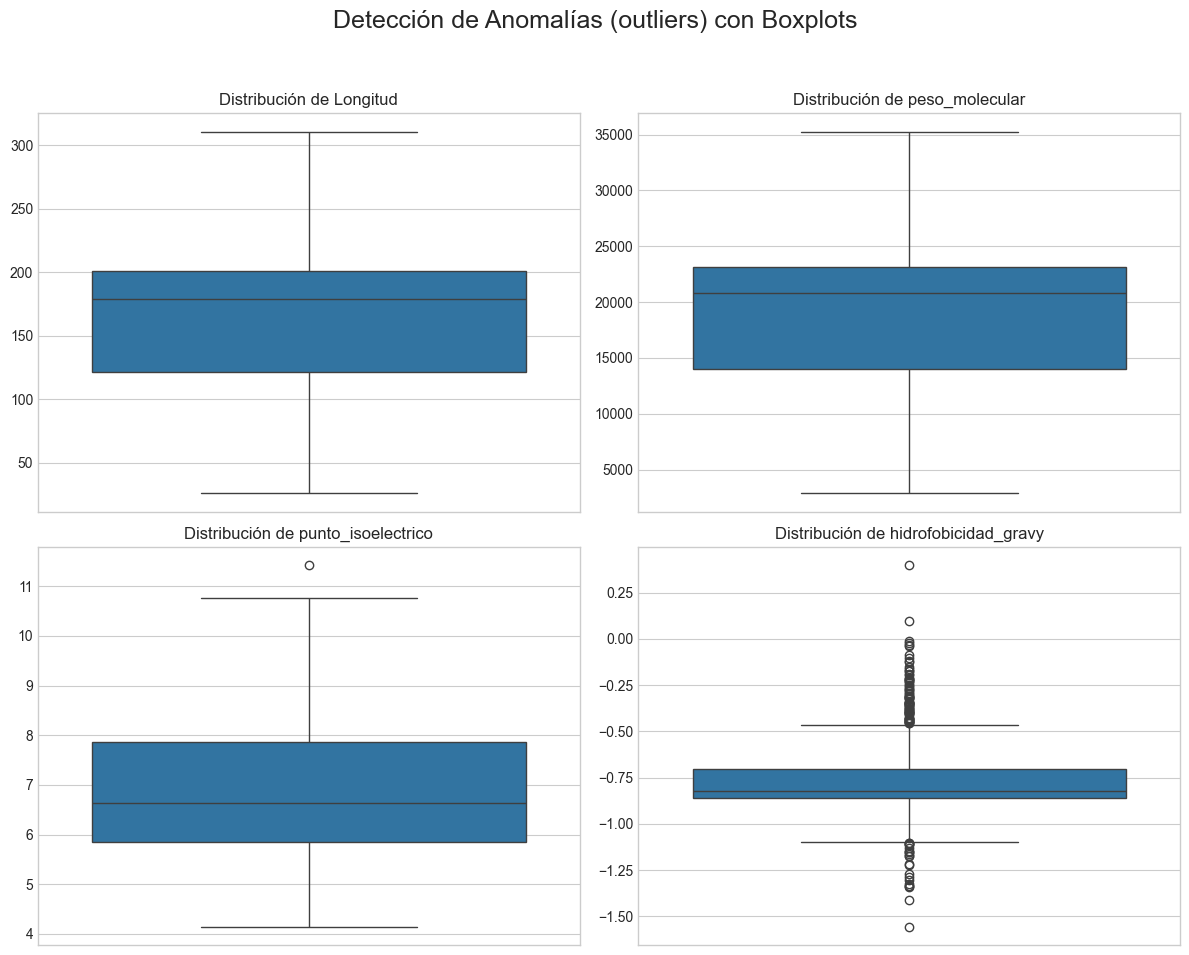

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que tu DataFrame se llama df_analisis
# Si no lo tienes cargado, necesitarías una línea como:
# df_analisis = pd.read_csv('tu_archivo.csv')

# 1. Lista de las columnas numéricas que quieres visualizar
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']

# 2. Crear una figura y un conjunto de subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Detección de Anomalías (outliers) con Boxplots', fontsize=18)

# 3. Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

# 4. Iterar sobre cada columna numérica y crear un boxplot en su respectivo subplot
for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df_filtrado[col], ax=axes[i], orient='v')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel('') # Opcional: limpiar la etiqueta del eje y

# 5. Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para que el título principal no se solape
plt.show()

In [42]:
out_dir = Path("../data/processed")

In [43]:
import pandas as pd

# Asumiendo que tu DataFrame filtrado se llama df_filtrado

# Definir el nombre del archivo de salida
nombre_archivo_fasta = out_dir/"secuencias_filtradas.fasta"

# Abrir el archivo en modo de escritura ('w')
with open(nombre_archivo_fasta, 'w') as archivo_fasta:
    # Iterar sobre cada fila del DataFrame
    for index, row in df_filtrado.iterrows():
        # Obtener el identificador y la secuencia de la fila actual
        identificador = row['ID']
        descripcion = row['Descripcion']
        secuencia = row['Secuencia']
        
        # Crear la línea de cabecera del formato FASTA
        # Combina el ID y la Descripción para una cabecera más informativa
        cabecera_fasta = f">{identificador} {descripcion}"
        
        # Escribir la cabecera y la secuencia en el archivo
        archivo_fasta.write(cabecera_fasta + "\n")
        archivo_fasta.write(secuencia + "\n")

print(f"¡Éxito! Se ha guardado el archivo '{nombre_archivo_fasta}' con {len(df_filtrado)} secuencias.")

¡Éxito! Se ha guardado el archivo '..\data\processed\secuencias_filtradas.fasta' con 898 secuencias.


In [ ]:
num_registros = validate_fasta_file(nombre_archivo_fasta)
# Usamos archivo_path.name para obtener solo el nombre del archivo para el reporte
if num_registros is not None:
   print(F"Archivo {nombre_archivo_fasta} FASTA válido.")


Procesando archivo: ..\data\processed\secuencias_filtradas.fasta...
 ¡Formato correcto! Se encontraron 898 registros.
Archivo ..\data\processed\secuencias_filtradas.fasta FASTA válidos.


# ---CODIGO DE REFRENCIA ------

In [2]:
# Conexión con Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Muestra todas las columnas
pd.set_option('display.max_columns', None)

## Carga del Dataset

Carga de datos de Peptidos con formato FASTA

Carga de archivos de datos de excel

In [3]:
# Ruta al archivo general_amps descargado de: http://dctpep.cpu-bioinfor.org/
#ruta_excel = '/content/drive/MyDrive/Colab Notebooks/MNA/Proyecto/peptide_library_all.xlsx' #colab run
ruta_excel = '../data/raw/peptide_library_all.xlsx'  #local run

# Leer el archivo Excel en un DataFrame
df = pd.read_excel(ruta_excel)

# Mostrar las primeras filas del DataFrame
df.head(3).T

,0,1,2
DCTPep_ID,DCTPep00001,DCTPep00002,DCTPep00003
DRAMP_ID,DRAMP02912,Not available,Not available
CancerPPD_ID,Not available,Not available,Not available
DBAASP_ID,1485,Not available,Not available
Cppsite_ID,Not available,Not available,Not available
Peptide_Name,SMAP-29,CA-MA,CA-MA3
Sequence,RGLRRLGRKIAHGVKKYGPTVLRIIRIA,KWKLFKKIGIGKFLHSAKKF,KWKLFKKIGPGKFLHSAKKF
Sequence_Length,28,20,20
UniProt_ID,Not available,Not available,Not available
PubChem_CID,16130512,Not available,Not available


## Información general del Dataset

In [4]:
df.shape

(6107, 51)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DCTPep_ID                        6107 non-null   object 
 1   DRAMP_ID                         6107 non-null   object 
 2   CancerPPD_ID                     6107 non-null   object 
 3   DBAASP_ID                        6098 non-null   object 
 4   Cppsite_ID                       6107 non-null   object 
 5   Peptide_Name                     5876 non-null   object 
 6   Sequence                         6107 non-null   object 
 7   Sequence_Length                  6107 non-null   int64  
 8   UniProt_ID                       6107 non-null   object 
 9   PubChem_CID                      6107 non-null   object 
 10  Origin                           6067 non-null   object 
 11  Type                             6069 non-null   object 
 12  Hemolytic_Activity  

Las siguientes columnas representan números de identificación y nombre de cada péptido dentro de diferentes bases de datos, por lo que las eliminaremos del dataset. Algunas bases no cuentan con dicha proteína por lo que se encuentran con la leyenda de 'Not Avaliable':

- Peptide_Name: Nombre de cada péptido en DCTPep.
- Structure: Estructura predicha por Alphafold, Mostrar con Mol*viewer, haga clic para descargar los archivos PDB.
- DCTPep_ID: El campo proporciona el número de acceso único que se vincula a la entrada DCTPep correspondiente.
- DRAMP_ID: El campo proporciona el número de acceso único que se vincula a la entrada DRAMP correspondiente.
- CancerPPD_ID: El campo proporciona el número de acceso único que se vincula a la entrada CancerPPD correspondiente.
- DBAASP_ID: El campo proporciona el número de acceso único que se vincula a la entrada DBAASP correspondiente.
- Cppsite_ID: El campo proporciona el número de acceso único que se vincula a la entrada Cppsite correspondiente.
- UniProt_ID: Proporciona los enlaces de acceso que dirijan a las entradas externas de Uniprot.
- PubChem_CID: CID de PubChem
- Predicted_Structure_ID: Estructura predicha por Alphafold, Mostrar con Mol*viewer, haga clic para descargar los archivos PDB.
- PDB_ID: Proporcione enlaces de acceso que dirijan a la entrada PDB correspondiente.
- Patent_ID: Numero de patente
- Patent_Title: Nombre de la patente
- Other_Published_ID: Otros identificadores publicados
- Literature: La información de los péptidos proviene de todo tipo de literatura o patentes, y la sección proporciona la forma de encontrar el texto completo.

In [6]:
# Variables de identificación
id_col = ['Peptide_Name', 'Structure','DCTPep_ID', 'DRAMP_ID', 'CancerPPD_ID', 'DBAASP_ID', 'Cppsite_ID', 'UniProt_ID',
          'PubChem_CID', 'Predicted_Structure_ID', 'PDB_ID', 'Patent_ID', 'Other_Published_ID', 'Literature', 'Patent_Title']
print('Número de variables de indentificación: ',len(id_col))
df[id_col].describe().T

Número de variables de indentificación:  15


,count,unique,top,freq
Peptide_Name,5876,5699,Xentry peptides,21
Structure,6107,2312,Not available,3796
DCTPep_ID,6107,6107,DCTPep00001,1
DRAMP_ID,6107,53,Not available,6055
CancerPPD_ID,6107,88,Not available,6020
DBAASP_ID,6098,1572,Not available,4515
Cppsite_ID,6107,749,Not available,5359
UniProt_ID,6107,473,Not available,5256
PubChem_CID,6107,64,Not available,6043
Predicted_Structure_ID,6107,2312,Not available,3796


In [7]:
# Elimina variables de identificación
df.drop(id_col, axis=1, inplace=True)

### Secuancias de aminoácidos duplicados

Las secuencias de aminoácidos son la estructura de los péptidos y proteínas, debido a eso, las secuencias que se encuentren duplicadas representan peptidos duplicados. Debido a esto se eliminaran del dataset para dejar solo proteínas únicas.

In [8]:
# Muestra solo los mayores a 1 en value_counts
df['Sequence'].value_counts()[df['Sequence'].value_counts() > 1]

Sequence
GLLxRIkTLL                      7
GLLkRIxTLL                      7
VKRFKKFFRKLKKSV                 6
XXLXAXX                         6
DDEⓍEQFⓍYHLXSFNXV               5
                               ..
VALALKALKKALKKLKKALKKAL         2
VRRFPWWWPFLRR                   2
DDEⓍEQFⓍYHLLSFNAV               2
TCRSSGRYCRSPYDRRRRYCRRITDACV    2
CSKSSDYQC                       2
Name: count, Length: 178, dtype: int64

In [9]:
# Ejemplo de péptido duplicado
df.loc[df['Sequence']=='GLLxRIkTLL']

,Sequence,Sequence_Length,Origin,Type,Hemolytic_Activity,Cytotoxicity,Binding_Target,Affinity,Mechanism,Nature,*,Classification,Helicity,Linear_Cyclic,Disulfide_Bond,N-terminal_Modification,C-terminal_Modification,Other_Modification,Chiral,Mass,Formula,Absent_amino_acids,Common_amino_acids,pI,Basic_residues,Acidic_residues,Net_charge,Polar_residues,Hydrophobic_residues,Hydrophobicity,Boman_Index,Half_Life,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm,Other_Information
2122,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis>256 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C4 (D-Lysine with butyrylated side gro...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2123,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis>256 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C6 (D-Lysine with 2-hexanoylated side ...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2124,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis>256 µM,HEK293T: IC50>256 µM,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C8 (D-Lysine with octanoylated side gr...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2125,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=256 µM,HEK293T: IC50=128 µM,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C10 (D-Lysine with decanoylated side g...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2126,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=32 µM,HEK293T: IC50=32 µM,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C12 (D-Lysine with laurylated side gro...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2127,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=32 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C14 (D-Lysine with myristoylated side ...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2128,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=16 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C16 (D-Lysine with palmitoylated side ...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not availabl

In [10]:
# Elimina duplicados en la columna 'Sequence'
df = df[~df['Sequence'].duplicated(keep='first')]

# Asigna la secuencia como Indice
df.set_index('Sequence', inplace=True)

### Valores Nulos
Es importante identificar aquellas columnas con un alto porcentaje de valores nulos.En algunas de las variables en vez de tener el campo en nulo dicen 'Not available'. En estos casos sustituiremos dicha frase por campos nulos.

In [11]:
# Convertir a nulo todos aquellos que digan 'Not available'
df.replace('Not available', None, inplace=True)

print('Proporción de Valores Nulos:')
print((df.isnull().sum()/df.shape[0]).round(2).sort_values(ascending=False))

Proporción de Valores Nulos:
*                                  1.00
Helicity                           0.99
Affinity                           0.98
Mechanism                          0.93
Other_Information                  0.88
Other_Modification                 0.84
Cytotoxicity                       0.81
Hemolytic_Activity                 0.80
Disulfide_Bond                     0.79
Binding_Target                     0.78
Linear_Cyclic                      0.11
N-terminal_Modification            0.06
C-terminal_Modification            0.06
Type                               0.01
Origin                             0.01
Extinction_Coefficient_cystines    0.00
Net_charge                         0.00
Absorbance_280nm                   0.00
Aliphatic_Index                    0.00
Half_Life                          0.00
Boman_Index                        0.00
Hydrophobicity                     0.00
Hydrophobic_residues               0.00
Polar_residues                     0.00
Sequence_Le

Las variables con alto porcentaje de valores nulos (mayor al 50%) son los siguientes:
- *:
- Helicity: Porcentaje de α hélices
- Affinity: Afinidad de unión entre péptidos y targets.
- Mechanism: Mecanismo de los péptidos que actúan como agentes anticancerígenos.
- Other_Information: Otra informacion
- Other_Modification: Aminoácidos
- Cytotoxicity: Información de citotoxicidad frente a líneas celulares normales (no cancerosas).
- Hemolytic_Activity: Información sobre la actividad hemolítica frente a los glóbulos rojos (RBC).
- Disulfide_Bond: Enlace de disulfuro (DSB) u otro enlace, como el enlace de cadena lateral-cadena principal (SMB), enlace peptídico N-C termini (NCB).
- Binding_Target: Sitio de acción de los péptidos contra las células cancerosas.
- Patent_Title: Nombre de la patente

Como podemos observar existen variables con alto porcentaje de valores nulos pero que dan información importante sobre el efecto clínico sobre los pacientes (por ejemplo: citotoxicidad, actividad hemolítica) o sobre su mecanismo de acción (por ejemplo: afinidad y mecanismo). Por tal motivo no es recomendable eliminarlos de primera instancia.




In [12]:
# Se elimina columna '*' por que todos sus valores son nulos
df.drop(['*'], axis=1, inplace=True)
df.shape

(5851, 34)

Las variables con las que cuenta el Dataset, posterior a que se quitaron los id y aquellas con mayor proporción de valores nulos, son los siguientes:

- Sequence: La secuencia peptídica que se representa mediante códigos de una sola letra. Los L-aminoácidos se expresan en mayúsculas y los D-aminoácidos se expresan en letras minúsculas. X se refiere a los aminoácidos modificados.
- Sequence_Length: Número de residuos en la secuencia peptídica.
- Origin: El organismo donde se extrajeron o aislaron los péptidos o proteínas.
- Type: Los péptidos se dividen en péptidos nativos y péptidos sintéticos según su origen.
- Nature: Clasificación de la actividad biológica. Además de anticancerígeno, también incluye antibacteriano, antifúngico, antiviral...
- Classification: Clasificados por tipo de péptido o mecanismo. Incluyendo péptidos dirigidos molecularmente, péptidos que penetran en las células, péptidos que se dirigen a tumores, mecanismo dirigido a la membrana, mecanismo de apoptosis, mecanismo - antiangiogénico...
- Linear_Cyclic: Peptido ciclico o linear
- N-terminal_Modification: Las modificaciones del terminal N según las referencias
- C-terminal_Modification: Las modificaciones del terminal C según las referencias
especiales (de 20 aminoácidos comunes).
- Chiral: Los aminoácidos L/D consisten en péptidos.
- Mass: Masa
- Formula: Formula del péptido
- Absent_amino_acids: Aminoacidos no incluidos
- Common_amino_acids: Animoacido mas comun en la sequencia
- pI: Punto isoeléctrico
- Basic_residues: Número de residuos base
- Acidic_residues: Número de residuos ácidos
- Net_charge: Carga Neta
- Polar_residues: Número de residuos polares
- Hydrophobic_residues: Número de residuos hidrofóbicos
- Hydrophobicity: Hidrofobicidad
- Boman_Index: Índice de Boman
- Half_Life: Vida media
- Aliphatic_Index: Índice alifático
- Extinction_Coefficient_cystines: Coeficiente de extinción de cistinas
- Absorbance_280nm: Absorbancia a 280nm
- Literature: La información de los péptidos proviene de todo tipo de literatura o patentes, y la sección proporciona la forma de encontrar el texto completo.

## Péptidos con actividad sobre VEGF
El objetivo del proyecto es crear un modelo que nos prediga la actividad de los péptidos sobre la proteína Diana VEGF. Por tal motivo, es importante identificar los péptidos con dicho efecto.

In [13]:
# Columna que identifica el efecto sobre la proteína diana 'VEGF' en cualquier columna
df['VEGF'] = df.apply(lambda x: x.astype(str).str.contains('VEGF').any()  , axis=1)
vegf = df.loc[df['VEGF']]
print('Peptidos con actividad sobre VEGF: ',vegf.shape[0])
vegf.head(5)

Peptidos con actividad sobre VEGF:  24


,Sequence_Length,Origin,Type,Hemolytic_Activity,Cytotoxicity,Binding_Target,Affinity,Mechanism,Nature,Classification,Helicity,Linear_Cyclic,Disulfide_Bond,N-terminal_Modification,C-terminal_Modification,Other_Modification,Chiral,Mass,Formula,Absent_amino_acids,Common_amino_acids,pI,Basic_residues,Acidic_residues,Net_charge,Polar_residues,Hydrophobic_residues,Hydrophobicity,Boman_Index,Half_Life,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm,Other_Information,VEGF
Sequence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RRPKGRGKRRREKQRP,16,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,232913,C84H157N41O20,ACDFHILMNSTVWY,R,12.91,10,1,9,2,0,-338.75,-13156,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,0.00,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
RRPKGRGKRRREKQRPCDKPRR,22,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,319204,C114H210N54O28S,AFHILMNSTVWY,R,12.61,13,2,11,3,0,-316.82,-17439,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,0.00,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
RRPKGRGKRRREKQRPSDKPRR,22,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,317597,C114H210N54O29,ACFHILMNTVWY,R,12.81,13,2,11,3,0,-331.82,-17907,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,0.00,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
RRPKGRGKRRREKQRPDAVPRR,22,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,313094,C113H207N53O28,CFHILMNSTWY,R,12.81,12,2,10,2,2,-283.18,-16427,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,17.73,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
CKGRGKRCREKQRPSDKPRR,20,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Cyclic,Cys1<--->Cys8,Free,Free,NaN,L,278092,C97H177N43O27S2,AFHILMNTVWY,R,11.93,10,2,8,5,0,-264.50,-13175,Mammalian: 1.2 hour##Yeast: >20 hour##E.coli: ...,0.00,125,6.58,Patent Application; Family: 5s / 5ex; Family J...,True


## Segmentación de Variables

In [14]:
# La columna Helicity se transforma a númerica
df['Helicity'] = df['Helicity'].str.replace('%', '').astype(float)
# La columna 'VEGF' se tranforma en string
df['VEGF'] = df['VEGF'].astype(int)
# Segmentación en variables númericas y categóricas:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns

#### Variables Numéricas

In [15]:
print('Total de variables numéricas: ', len(num_col))

Total de variables numéricas:  15


In [16]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Sequence_Length,5851.0,17.358742,9.955594,2.00,10.00,15.00,23.00,97.00
Helicity,36.0,38.554167,22.952987,0.35,27.20,36.25,49.80,89.80
Mass,5851.0,227110.658862,132823.364603,-576.00,137212.00,199463.00,302478.00,1230031.00
pI,5851.0,9.326156,2.932098,3.17,6.34,10.30,11.65,13.78
Basic_residues,5851.0,4.193129,3.447575,0.00,1.00,4.00,6.00,35.00
Acidic_residues,5851.0,1.075372,1.786261,0.00,0.00,0.00,1.00,20.00
Net_charge,5851.0,3.117758,3.630353,-9.00,0.00,3.00,6.00,35.00
Polar_residues,5851.0,3.764656,4.473147,0.00,1.00,3.00,5.00,41.00
Hydrophobic_residues,5851.0,6.185267,4.128889,0.00,3.00,6.00,9.00,40.00
Hydrophobicity,5851.0,-33.312748,116.400063,-450.00,-98.89,-33.00,43.33,420.00


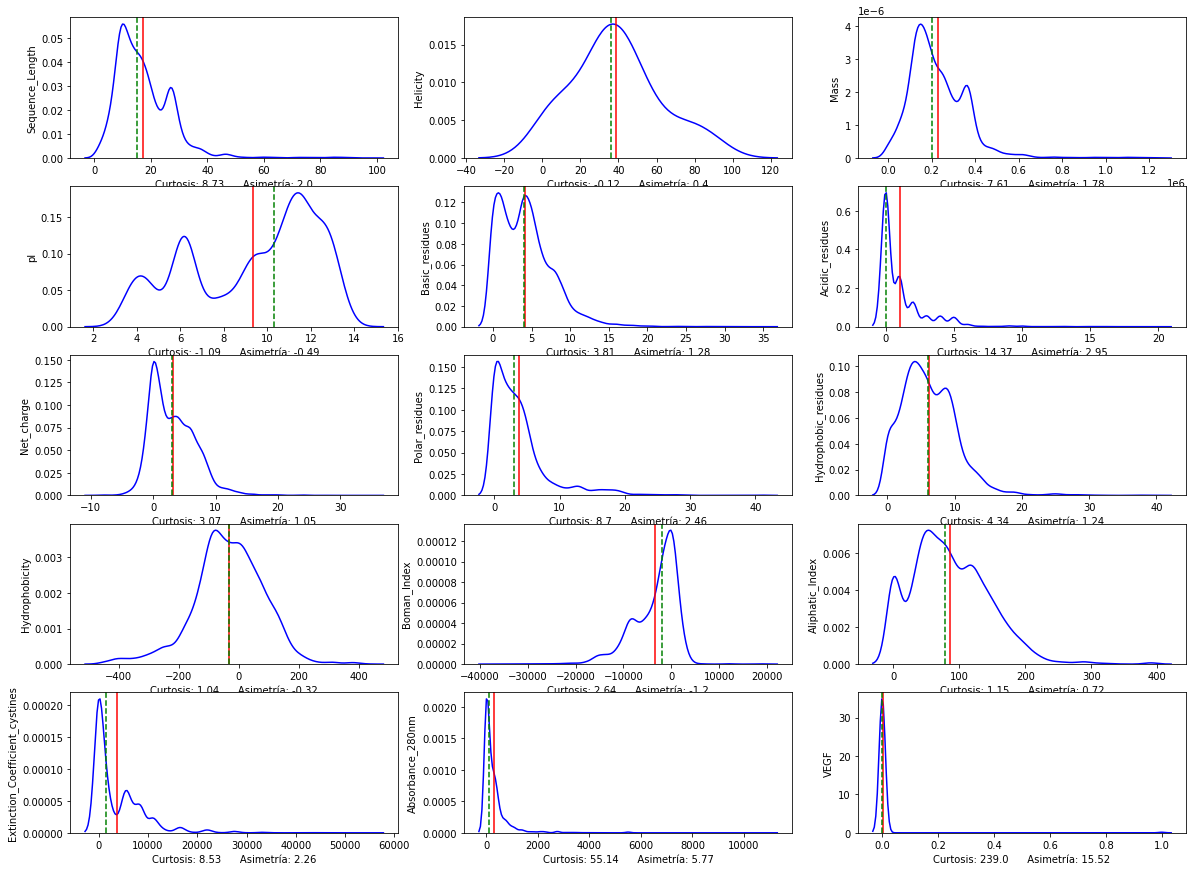

In [17]:
# Gráficas de densidad de las variables numéricas
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.kdeplot(df[col], color = 'Blue', ax=ax)
  ax.axvline(df[col].mean(), color='red')
  ax.axvline(df[col].median(), color='green', linestyle='--')
  ax.set(ylabel = f'{col}', xlabel = 'Curtosis: '+str(round(df[col].kurt(),2)) + "      Asimetría: " + str(round(df[col].skew(),2)))

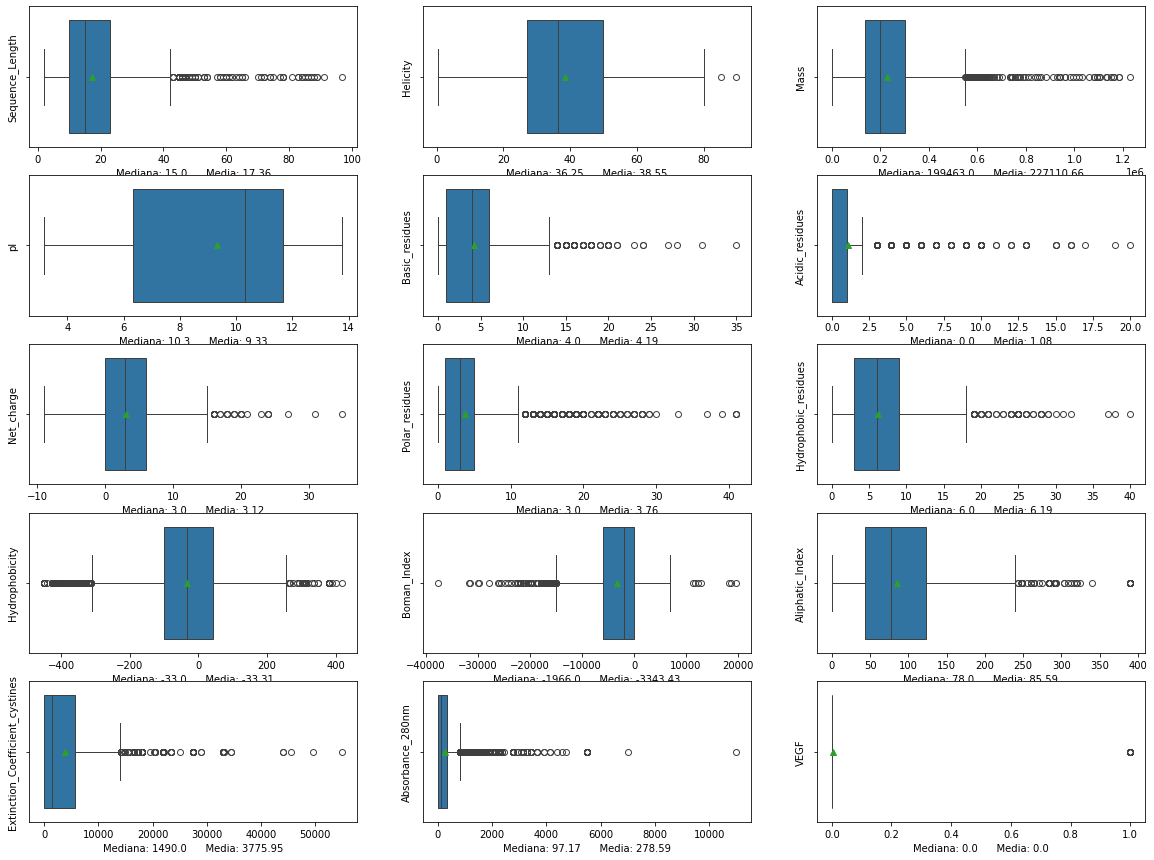

In [18]:
# Gráficas de caja de variables númericas
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.boxplot(x=df[col], showmeans=True, ax=ax)
  ax.set(ylabel = f'{col}', xlabel = 'Mediana: '+str(round(df[col].median(),2)) + "      Media: " + str(round(df[col].mean(),2)))

In [19]:
# Porcentajes de Otliers
sin_outliers = df.copy()
print('Porcentaje de outliers por variable:')
for col in num_col:
    IQR = sin_outliers[col].quantile(0.75) - sin_outliers[col].quantile(0.25)
    lower_limit = sin_outliers[col].quantile(0.25) - (IQR * 1.5)
    upper_limit = sin_outliers[col].quantile(0.75) + (IQR * 1.5)

    #Almacenando los valores atipicos dentro de la variable IQR_outlier
    IQR_outlier = sin_outliers[(sin_outliers[col] < lower_limit) | (sin_outliers[col] > upper_limit)]

    # Imprime los  porcentajes
    porcentaje = ((IQR_outlier[col].count())*100/len(sin_outliers.axes[0])).round(2)
    print(col +": "+ str(porcentaje)+'%')

    sin_outliers.drop(IQR_outlier.index, inplace = True)

Porcentaje de outliers por variable:
Sequence_Length: 1.81%
Helicity: 0.03%
Mass: 0.4%
pI: 0.0%
Basic_residues: 0.98%
Acidic_residues: 13.37%
Net_charge: 0.0%
Polar_residues: 8.46%
Hydrophobic_residues: 1.14%
Hydrophobicity: 2.9%
Boman_Index: 4.5%
Aliphatic_Index: 0.39%
Extinction_Coefficient_cystines: 5.29%
Absorbance_280nm: 5.77%
VEGF: 0.05%


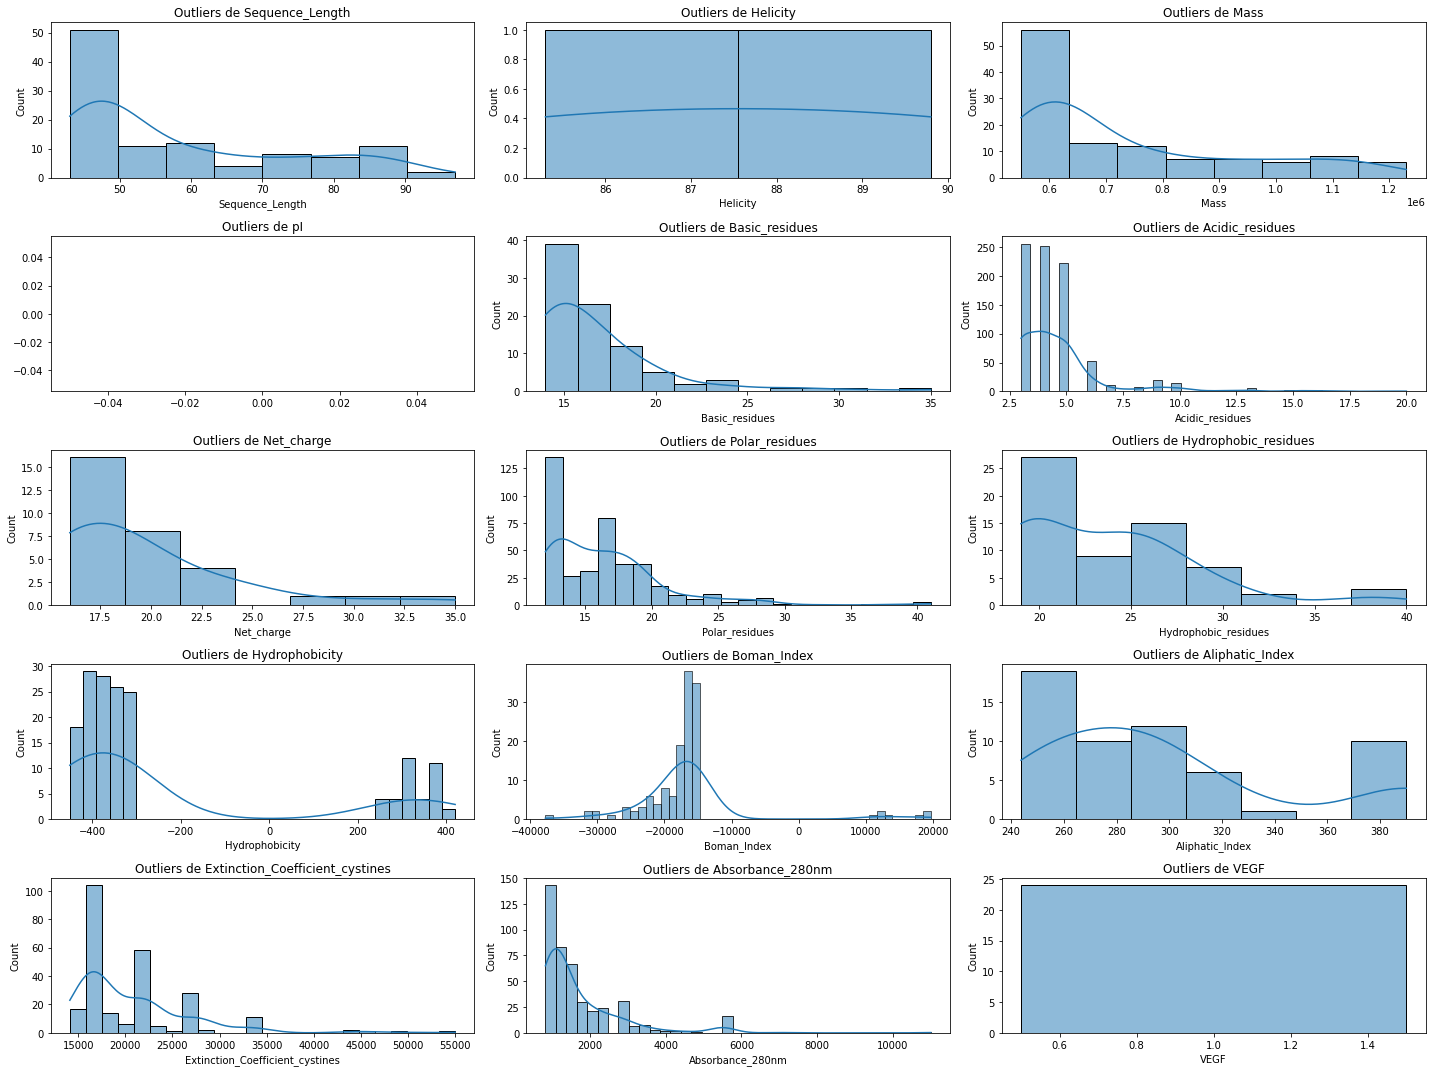

In [20]:
# Gráficas de aoutliers
def identificar_outliers(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_limit = df[col].quantile(0.25) - 1.5 * IQR
    upper_limit = df[col].quantile(0.75) + 1.5 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

# Crear una figura con subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.ravel()

# Crear un histograma para los valores atípicos de cada variable numérica
for col, ax in zip(df.select_dtypes(include='number').columns, axes):
    outliers = identificar_outliers(df, col)
    sns.histplot(outliers[col], kde=True, ax=ax)
    ax.set_title(f'Outliers de {col}')

plt.tight_layout()
plt.show()


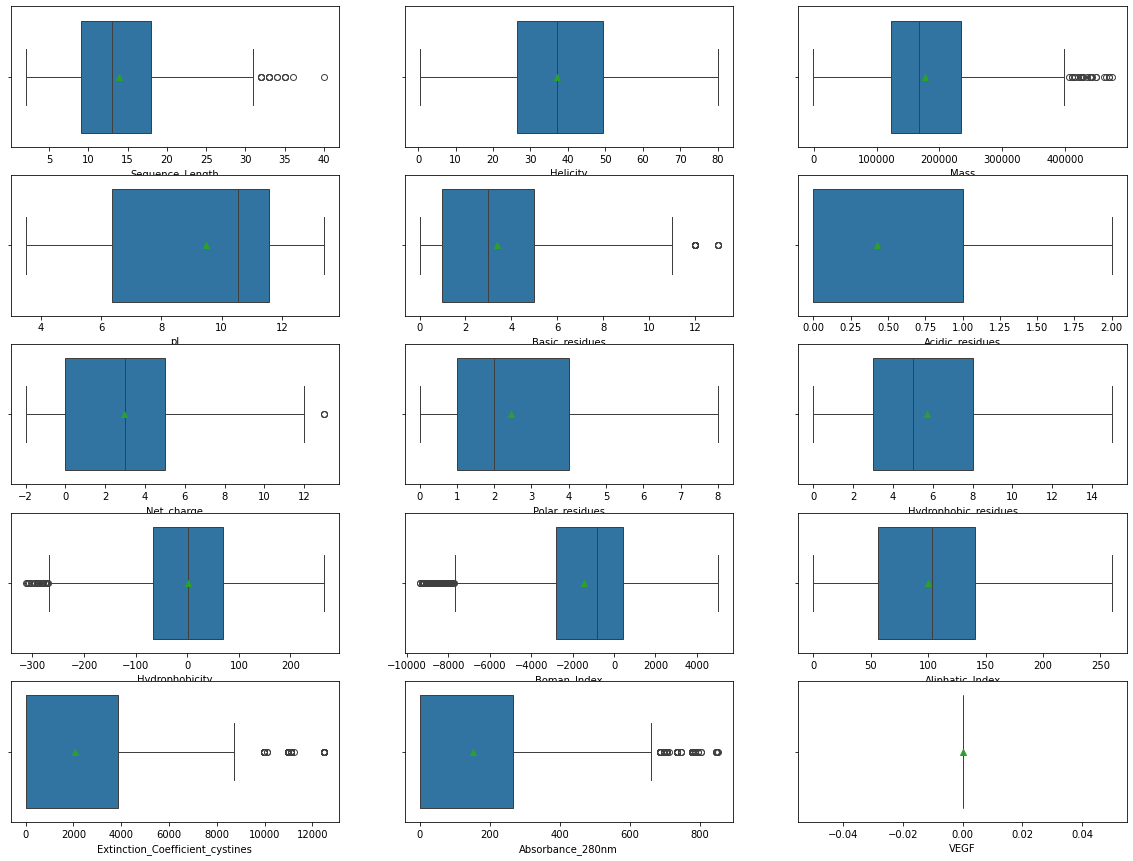

In [21]:
# Gráficas de caja sin valores atípicos
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.boxplot(x=sin_outliers[col], showmeans=True, ax=ax)

In [22]:
# Proporcion de valores atípicos
print('Filas totales',len(df.axes[0]))
print('Filas sin outliers',len(sin_outliers.axes[0]))
print("Porcentaje de los registros con outliers:")
print(round(100*(len(df.axes[0]) - len(sin_outliers.axes[0]))/len(df.axes[0]),2))

Filas totales 5851
Filas sin outliers 3659
Porcentaje de los registros con outliers:
37.46


####Variables Categóricas

In [23]:
print('Total de variables categóricas: ', len(cat_col))

Total de variables categóricas:  20


In [24]:
df[cat_col].describe().T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
Formula,5851,4804,C62H112N16O12,56
Absent_amino_acids,5843,3301,CHKLST,205
Hemolytic_Activity,1179,750,RBC: IC50 ≥ 65 µM,37
Cytotoxicity,1084,738,HEK 293T: Negligible cytotoxicity,76
Common_amino_acids,5851,568,R,1033
Origin,5779,447,Synthetic,3542
Other_Modification,939,331,Ⓧ(5)=(R)-2-Amino-2-methyl-9-decenoic acid; Ⓧ(1...,76
Disulfide_Bond,1216,242,Native peptide,367
Mechanism,389,121,Specifically block the α9α10nAChR,91
Affinity,132,107,IC50=16 nM (Blocking α9α10nAChR),5


In [25]:
# Recuentos únicos
for column in (cat_col):
    print(df[column].value_counts())
    print('-' * 50)

Origin
Synthetic                                    3542
Protein derived                               322
Synthetic construct                           285
FLAK peptides                                 138
Animalia                                       70
                                             ... 
Litopenaeus vannamei                            1
garlic                                          1
Fusarium spp. isolated from Korean potato       1
B. raniceps skin secretion                      1
Synthetic (derived from MGS4)                   1
Name: count, Length: 447, dtype: int64
--------------------------------------------------
Type
Synthetic peptide                             4519
Native peptide                                1287
Synthetic peptide (Derived from Decoralin)       8
Name: count, dtype: int64
--------------------------------------------------
Hemolytic_Activity
RBC: IC50 ≥ 65 µM                                                              37
Rat erythrocytes:

Existen variables categóricas con un gran número de datos únicos diferentes los cuales no son factibles para gráficar. Debido a esto únicamente aquellos con menos de 10 valores únicos:

In [26]:
# Descripción de las columnas categóricas
cat_desc = df[cat_col].describe().T
cat_desc = cat_desc[cat_desc['unique'] < 10]
cat_desc = cat_desc.sort_values(by='unique', ascending=False)
cat_desc

,count,unique,top,freq
Linear_Cyclic,5203,5,Linear,4326
Type,5814,3,Synthetic peptide,4519
Chiral,5851,3,L,5377


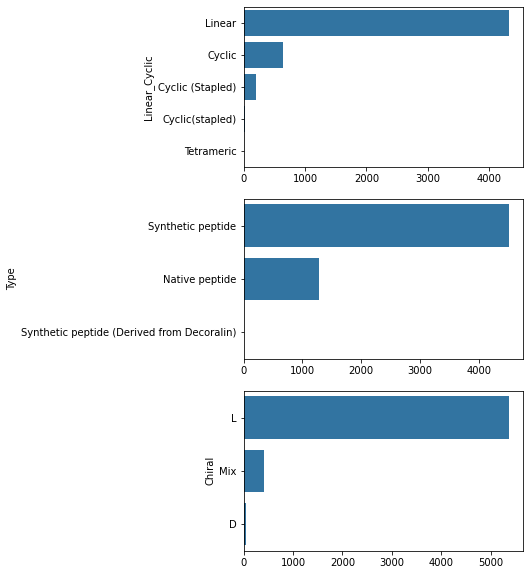

In [27]:
#Gráficas de recuentos únicos
fig, axes = plt.subplots(3,1, figsize=(5,10))
axes = axes.ravel()
for col, ax in zip(df[['Linear_Cyclic', 'Type', 'Chiral']], axes):
  sns.countplot(y=df[col], ax=ax, order=df[col].value_counts().index)
  ax.set(xlabel=None)

## Análisis bivariado y multivariado

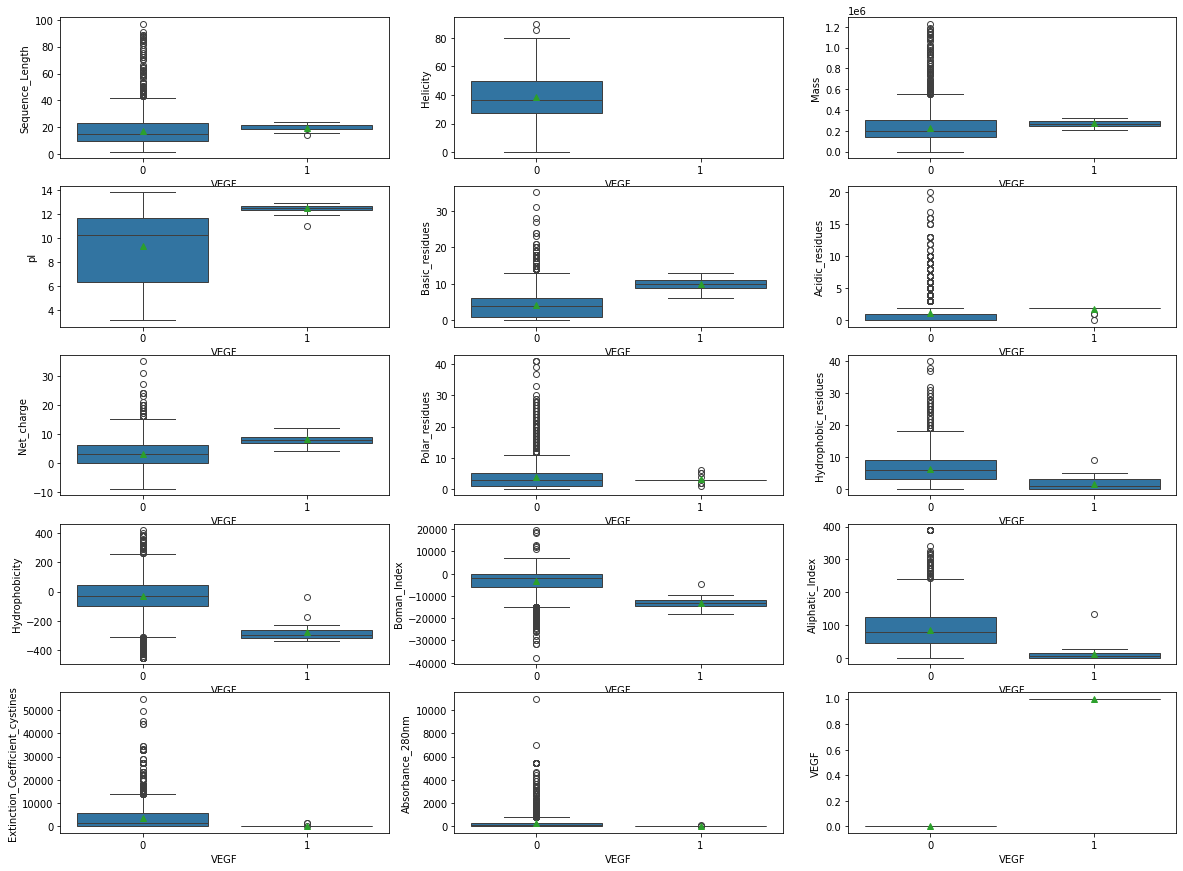

In [28]:
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.boxplot(y=df[col], x=df['VEGF'], ax=ax, showmeans=True)
  ax.set(ylabel = f'{col}')

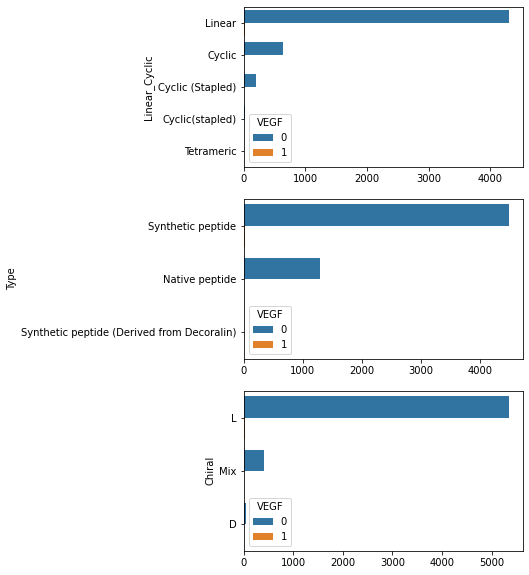

In [29]:
#Gráficas de recuentos únicos
fig, axes = plt.subplots(3,1, figsize=(5,10))
axes = axes.ravel()
for col, ax in zip(df[['Linear_Cyclic', 'Type', 'Chiral']], axes):
  sns.countplot(y=df[col], ax=ax, order=df[col].value_counts().index, hue = df['VEGF'])
  ax.set(xlabel=None)

<Axes: >

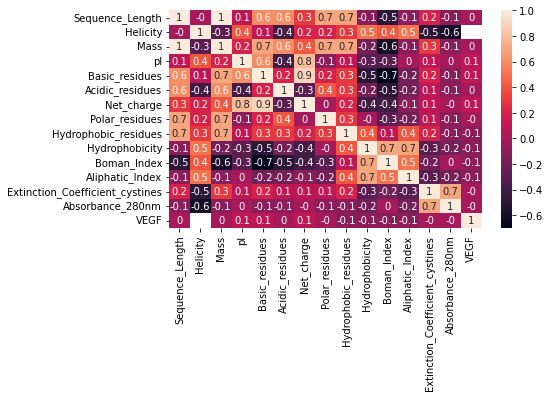

In [30]:
# Mapa de calor de las correlaciones entre variables cuantitativas
plt.figure(figsize = (7, 4))
sns.heatmap(round(df[num_col].corr(numeric_only=True),1), annot = True)

In [31]:
#Guardar el dataset con los cambios realizados
df.to_csv('../data/processed/peptide_processed.csv', index = False)

### Conlcusiones

De acuerdo al analisis del set de datos obtenido, nos damos cuenta que es un dataset desbalanceado, mostrando mas registros sin relacion a la proteina VEGF, esto se debe tener en consideracion en las siguientes etapas del proyecto, para hacer el tratamineto de los datos en forma correcta y minimizar los riesgos al implementar los modelos para obtener resultados solidos y lo mas acertados posibles

## Referencias

1. World Health Organization. (2022). Cancer. https://www.who.int/news-room/fact-sheets/detail/cancer

2. Instituto Nacional de Estadística y Geografía (INEGI). (2024). Estadísticas a propósito del Día Mundial contra el Cáncer (4 de febrero). https://www.inegi.org.mx/contenidos/saladeprensa/aproposito/2024/EAP_Cancer.pdf

3. DCTPep (Data of cancer therapy peptides). http://dctpep.cpu-bioinfor.org/


- Stephen F. Altschul, Thomas L. Madden, Alejandro A. Schäffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of protein database search programs", Nucleic Acids Res. 25:3389-3402.

- compositional score matrix adjustment
Stephen F. Altschul, John C. Wootton, E. Michael Gertz, Richa Agarwala, Aleksandr Morgulis, Alejandro A. Schäffer, and Yi-Kuo Yu (2005) "Protein database searches using compositionally adjusted substitution matrices", FEBS J. 272:5101-5109.

- Title:NCBI Protein Reference Sequences
Molecule Type:Protein
Update date:2025/09/26
Number of sequences:414629663


Title:All non-redundant GenBank CDS translations+PDB+SwissProt+PIR+PRF excluding environmental samples from WGS projects
Molecule Type:Protein
Update date:2025/09/26
Number of sequences:964008091